импорт библиотек

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

анализ на аномалии

In [2]:
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)

df_train.head()

,buying_price,maint_price,doors_count,person_count,lug_boot_size,safety,class
0,3,2,больше,4,2,2,0
1,1,3,3,4,1,2,1
2,2,0,4,больше,0,2,1
3,0,1,2,2,2,2,0
4,1,0,больше,2,1,0,0


что значат признаки и целевая переменная



| Название переменной | Роль            | Тип            | Описание                                       | Значения                                                |
|---------------------|-----------------|----------------|------------------------------------------------|---------------------------------------------------------|
| buying_price        | Признак         | Категорический | Цена покупки                                   | 0 - низкая, 1 - средняя, 2 - высокая, 3 - очень высокая |
| maint_orice         | Признак         | Категорический | Цена обслуживания                              | 0 - низкая, 1 - средняя, 2 - высокая, 3 - очень высокая |
| doors_count         | Признак         | Категорический | Количество дверей                              | 2, 3, 4 и больше                                        |
| person_count        | Признак         | Категорический | Вместимость (людей для перевозки)             | 2, 4 и больше                                           |
| lug_boot_size       | Признак         | Категорический | Размер багажника                               | 0 - маленький, 1 - средний, 2 - большой                  |
| safety              | Признак         | Категорический | Предполагаемая безопасность автомобиля         | 0 - низкая, 1 - средняя, 2 - высокая                     |
| class               | Целевая переменная | Категорический | Оценка                                         | 0 - неприемлемая, 1 - приемлемая, 2 - хорошая, 3 - очень хорошая |


в столбцах "doors_count" и "person_count" помимо числовых значений возможно значение "больше". Для того, чтобы применить модель классификации, нам нужно перевести это значение в числовое. Это можно сделать разными способами: закодировать цифрой (например, 5, но можно кастомизировать кодировку) или, поскольку «больше» указывает на четыре или более дверей (или на 5 и больше человек в машине), вы можете рассмотреть возможность бинаризации этого столбца. Например, вы можете создать четыре двоичных столбца: «двери_2», «двери_3», «двери_4» и «двери_5больше», где каждый столбец указывает, имеет ли машина столько или больше дверей.

кодировка цифрой 5:


In [3]:
mapping = {'2':2, '3':3, '4':4,'больше': 5} 
df_train['doors_count'] = df_train['doors_count'].map(mapping)
df_train['person_count'] = df_train['person_count'].map(mapping)
df_test['doors_count'] = df_test['doors_count'].map(mapping)
df_test['person_count'] = df_test['person_count'].map(mapping)

первичный анализ

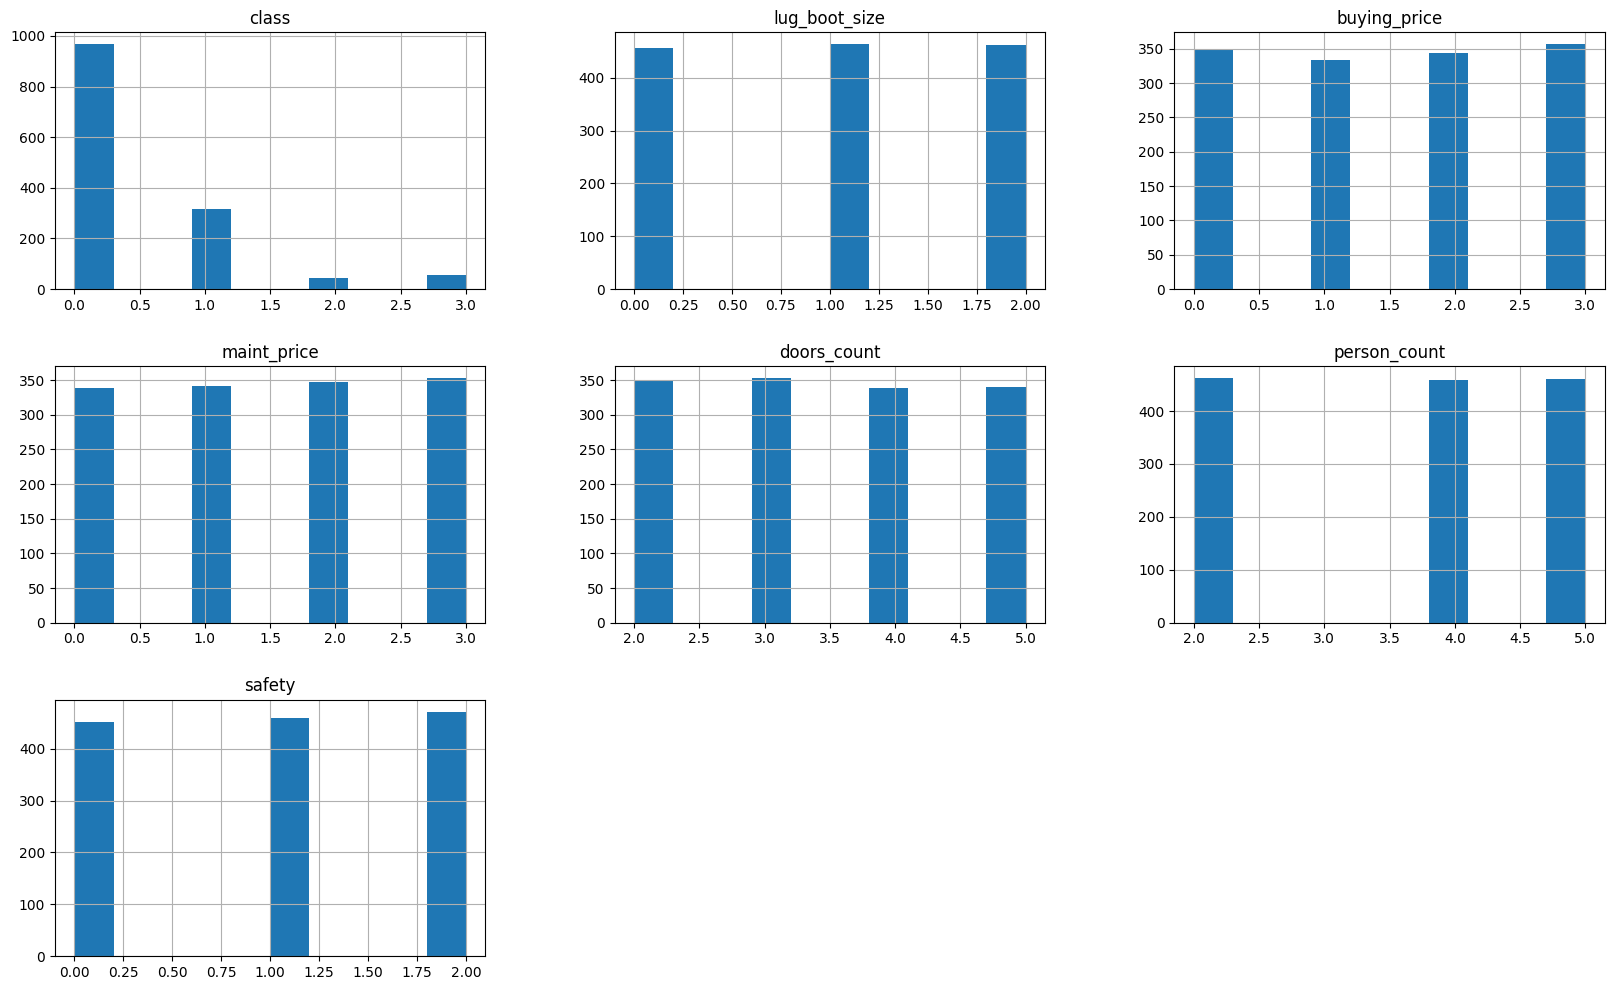

In [4]:
features = list(set(df_train.columns) - set(['DateTime']))

_ = df_train[features].hist(figsize=(20,12))

анализ корелляций

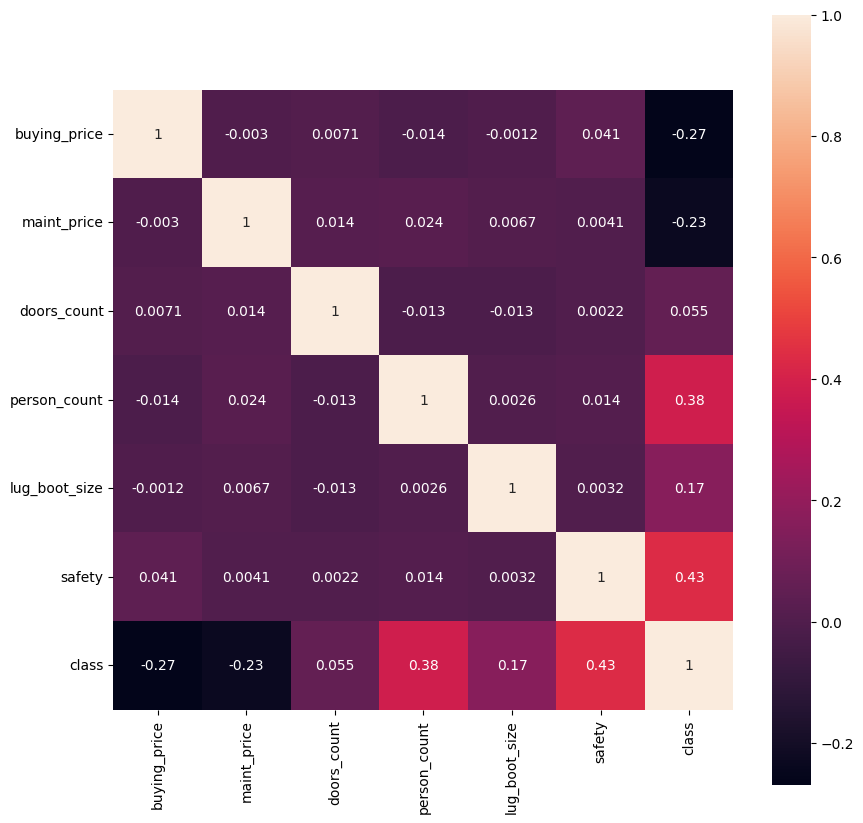

In [5]:
plt.rcParams['figure.figsize']=(10,10)

corr = df_train.corr()
g = sns.heatmap(corr, square = True, annot=True)

предобработка создание обуч и тест выборки

In [6]:
X = df_train.drop(["class"], axis = 1)
y = df_train["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,buying_price,maint_price,doors_count,person_count,lug_boot_size,safety
415,2,1,3,5,0,2
371,2,0,4,4,2,1
716,0,1,2,5,0,0
1089,0,3,4,2,0,1
1107,3,3,5,4,1,2


выбор модели (наивный байессовский классификатор)

In [7]:
clf = GaussianNB()

clf.fit(X_train, y_train)

GaussianNB()

предсказание целевого столбца

In [8]:
y_pred = clf.predict(X_test)

метрика

In [9]:
f1 = f1_score(y_test, y_pred, average= 'macro')
print("F1 мера бейзлайна:", f1)

F1 мера бейзлайна: 0.5162789090807667


ГЕНЕРАЦИЯ ОТВЕТА В CSV


f1 = f1_score(y_test, y_pred, average= 'macro')
print("F1 мера бейзлайна:", f1)

df_test["class"] = clf.predict(X)

df_test.head()

df_test.sort_index().to_csv("submit.csv")